<a href="https://colab.research.google.com/github/PhuocPhat19146046/PhuocPhat19146046/blob/main/faceID_group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential,load_model
from keras.layers import Dense , Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import load_img,img_to_array
from keras.backend import categorical_crossentropy
from tensorflow.keras.optimizers import  SGD
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM, Flatten
from tensorflow.keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.15)
data_train=datagen.flow_from_directory('drive/MyDrive/Colab Notebooks/faceID_group/',
                                       target_size=(150,150),batch_size=10,
                                       interpolation="lanczos",class_mode='categorical',
                                       shuffle=False,subset="training")
data_vali=datagen.flow_from_directory('drive/MyDrive/Colab Notebooks/faceID_group/',
                                      target_size=(150,150),batch_size=10,
                                      interpolation="lanczos",class_mode='categorical',
                                      shuffle=False,subset="validation")

Found 185 images belonging to 4 classes.
Found 31 images belonging to 4 classes.


In [ ]:
data_train.class_indices

{'H_An': 0, 'Phat': 1, 'T_An': 2, 'other': 3}

In [ ]:
model=Sequential()
model.add(Conv2D(96,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='same',input_shape=(150,150,3)))
model.add(Conv2D(96,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(150,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(150,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(150,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(4,activation='softmax'))
opt=SGD(lr=0.001,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(data_train,epochs=20,batch_size=64,validation_data=data_vali,verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
19/19 [==============================] - 25s 1s/step - loss: 5.9429 - accuracy: 0.2595 - val_loss: 1.3416 - val_accuracy: 0.2903
Epoch 2/20
19/19 [==============================] - 20s 1s/step - loss: 1.4723 - accuracy: 0.2054 - val_loss: 1.3518 - val_accuracy: 0.2903
Epoch 3/20
19/19 [==============================] - 20s 1s/step - loss: 1.3851 - accuracy: 0.2162 - val_loss: 1.2819 - val_accuracy: 0.3226
Epoch 4/20
19/19 [==============================] - 20s 1s/step - loss: 1.2764 - accuracy: 0.3892 - val_loss: 1.0550 - val_accuracy: 0.7742
Epoch 5/20
19/19 [==============================] - 22s 1s/step - loss: 0.9437 - accuracy: 0.6703 - val_loss: 1.1198 - val_accuracy: 0.4839
Epoch 6/20
19/19 [==============================] - 20s 1s/step - loss: 1.1455 - accuracy: 0.6432 - val_loss: 0.8607 - val_accuracy: 0.7097
Epoch 7/20
19/19 [==============================] - 20s 1s/step - loss: 0.8050 - accuracy: 0.7027 - val_loss: 0.8381 - val_accuracy: 0.6129
Epoch 8/20
19/19 [==

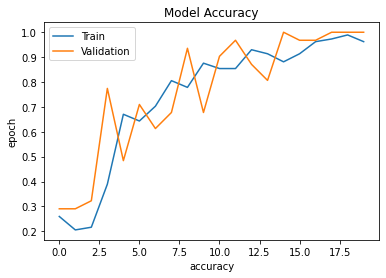

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [ ]:
#model.save('drive/MyDrive/Colab Notebooks/model/faceID_group.h5')

In [ ]:
from tensorflow.keras.models import load_model
model_1=load_model('drive/MyDrive/Colab Notebooks/model/faceID_group.h5')

Found 39 images belonging to 1 classes.


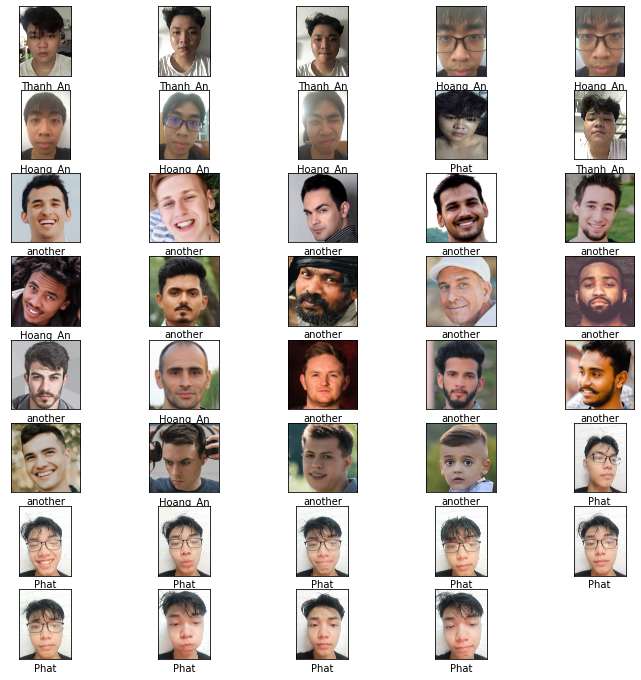

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import os
import matplotlib.pyplot as plt
from skimage import io
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
datagenerator=datagen.flow_from_directory('drive/MyDrive/Colab Notebooks/data/test_faceID/',
                                          target_size=(128,128),batch_size=5,
                                          interpolation="lanczos",shuffle=False)
face={0:'Hoang_An',
      1:'Phat',
      2:'Thanh_An',
      3:'another'}
plt.figure(figsize=(12,12))
for i in range(len(datagenerator.filenames)):
    plt.subplot(8,5,i+1)
    plt.imshow(io.imread(os.path.join(datagenerator.directory,
                                      datagenerator.filenames[i])))
    plt.xticks([])
    plt.yticks([])
    img=load_img('drive/MyDrive/Colab Notebooks/data/test_faceID/'+datagenerator.filenames[i],
                 target_size=(150,150))
    img=img_to_array(img)
    img=img.reshape(1,150,150,3)
    img=img.astype('float')
    img/=255
    plt.xlabel(face[np.argmax(model_1.predict(img))])
plt.show()